In [ ]:
# Untuk manipulasi data
import pandas as pd
import numpy as np

# Untuk membagi data menjadi train dan test
from sklearn.model_selection import train_test_split

# Untuk Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

# Untuk evaluasi model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Untuk manipulasi data
import pandas as pd
import numpy as np

# Untuk membagi data menjadi train dan test
from sklearn.model_selection import train_test_split

# Untuk Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

# Untuk evaluasi model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Untuk visualisasi (opsional, jika perlu menampilkan pohon)
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Path ke dataset
file_path = '/content/Energy Data.csv'

# Membaca dataset menggunakan pandas
try:
    df = pd.read_csv(file_path)
    print("Dataset berhasil diimpor.")
    print(f"Jumlah data: {df.shape[0]} baris dan {df.shape[1]} kolom.")
    print("Contoh data:")
    print(df.head())
except FileNotFoundError:
    print("File tidak ditemukan! Pastikan path file sudah benar.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset berhasil diimpor.
Jumlah data: 1893 baris dan 5 kolom.
Contoh data:
      AT      V       AP     RH      PE
0  12.49  42.30  1018.23  65.68  447.41
1  24.01  51.43  1016.42  67.94  477.32
2  19.64  56.06  1010.90  77.79  440.42
3  16.97  53.02  1024.69  93.76  448.43
4   8.12  41.89  1012.44  67.05  469.04


In [ ]:
file_path = '/content/Energy Data.csv'
data = pd.read_csv(file_path)
print("Dataset berhasil diimpor.")
print(f"Jumlah data: {df.shape[0]} baris dan {df.shape[1]} kolom.")
print("Contoh data:")
data.head(5)

Dataset berhasil diimpor.
Jumlah data: 1893 baris dan 5 kolom.
Contoh data:


,AT,V,AP,RH,PE
0,12.49,42.30,1018.23,65.68,447.41
1,24.01,51.43,1016.42,67.94,477.32
2,19.64,56.06,1010.90,77.79,440.42
3,16.97,53.02,1024.69,93.76,448.43
4,8.12,41.89,1012.44,67.05,469.04


In [ ]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur (X) dan target (y)
X = data.drop(columns=['PE'])  # Fitur (independent variables)
y = data['PE']                 # Target (dependent variable)

# Membagi dataset menjadi set pelatihan dan pengujian (80% pelatihan, 20% pengujian)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifikasi ukuran set pelatihan dan pengujian
print("Ukuran Set Pelatihan:", X_train.shape, y_train.shape)
print("Ukuran Set Pengujian:", X_test.shape, y_test.shape)

Ukuran Set Pelatihan: (1514, 4) (1514,)
Ukuran Set Pengujian: (379, 4) (379,)


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Membuat model Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Melatih model pada set pelatihan
model.fit(X_train, y_train)

# Menampilkan pesan bahwa model telah dilatih
print("Model Decision Tree Regressor telah dilatih pada set pelatihan.")

Model Decision Tree Regressor telah dilatih pada set pelatihan.


In [ ]:
# Memprediksi hasil untuk set pengujian
y_pred = model.predict(X_test)

# Menampilkan beberapa hasil prediksi
print("Beberapa hasil prediksi:", y_pred[:5])
print("Beberapa nilai aktual:", y_test[:5].values)

Beberapa hasil prediksi: [467.14 484.87 476.18 469.68 441.54]
Beberapa nilai aktual: [453.85 489.79 456.19 474.91 459.25]


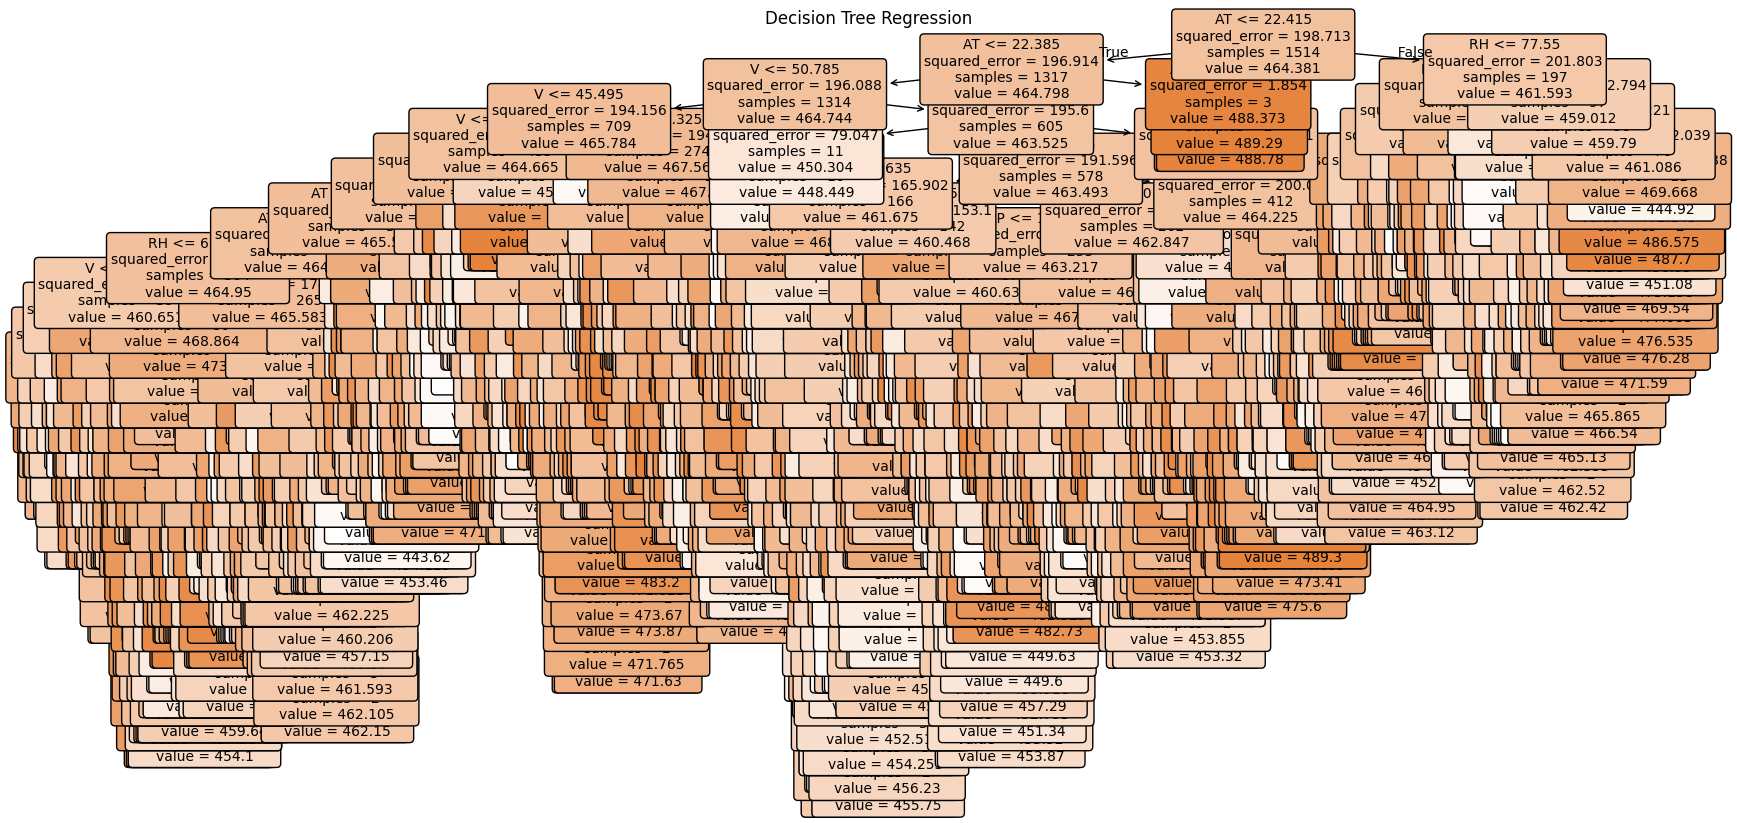

In [ ]:
# Membuat visualisasi pohon keputusan
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Regression")
plt.show()

In [ ]:
!pip install graphviz

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Mengekspor pohon ke format DOT
dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    special_characters=True
)

# Membuat visualisasi menggunakan Graphviz
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Menyimpan ke file "decision_tree.pdf" (opsional)
graph.view()                   # Membuka file visualisasi (opsional)

'decision_tree.pdf'

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Root Mean Squared Error (RMSE)
rmse = mse ** 0.5
print("Root Mean Squared Error (RMSE):", rmse)

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 416.8391878627968
Mean Absolute Error (MAE): 16.556411609498678
Root Mean Squared Error (RMSE): 20.416639974853766
R-squared (R²): -1.0440674772783454
